In [441]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline
import statsmodels.api as sm 
import pylab as pl
import seaborn as sns


df = pd.read_csv('./assets/billboard.csv')
df.head()


,year,artist.inverted,solo.orband,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Band,Independent Women Part I,"3,38,00 AM",Pop,23-Sep-00,18-Nov-00,78,63,...,*,*,*,*,*,*,*,*,*,*
1,2000,Santana,Solo Artist,"Maria, Maria","4,18,00 AM",Rock,12-Feb-00,8-Apr-00,15,8,...,*,*,*,*,*,*,*,*,*,*
2,2000,Savage Garden,Band,I Knew I Loved You,"4,07,00 AM",Rock,23-Oct-99,29-Jan-00,71,48,...,*,*,*,*,*,*,*,*,*,*
3,2000,Madonna,Solo Artist,Music,"3,45,00 AM",Pop,12-Aug-00,16-Sep-00,41,23,...,*,*,*,*,*,*,*,*,*,*
4,2000,"Aguilera, Christina",Solo Artist,Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,5-Aug-00,14-Oct-00,57,47,...,*,*,*,*,*,*,*,*,*,*


In [442]:
#pd.set_option('display.max_rows',999)
#pd.set_option('display.max_columns',999)
list(df.columns.values)

['year',
 'artist.inverted',
 'solo.orband',
 'track',
 'time',
 'genre',
 'date.entered',
 'date.peaked',
 'x1st.week',
 'x2nd.week',
 'x3rd.week',
 'x4th.week',
 'x5th.week',
 'x6th.week',
 'x7th.week',
 'x8th.week',
 'x9th.week',
 'x10th.week',
 'x11th.week',
 'x12th.week',
 'x13th.week',
 'x14th.week',
 'x15th.week',
 'x16th.week',
 'x17th.week',
 'x18th.week',
 'x19th.week',
 'x20th.week',
 'x21st.week',
 'x22nd.week',
 'x23rd.week',
 'x24th.week',
 'x25th.week',
 'x26th.week',
 'x27th.week',
 'x28th.week',
 'x29th.week',
 'x30th.week',
 'x31st.week',
 'x32nd.week',
 'x33rd.week',
 'x34th.week',
 'x35th.week',
 'x36th.week',
 'x37th.week',
 'x38th.week',
 'x39th.week',
 'x40th.week',
 'x41st.week',
 'x42nd.week',
 'x43rd.week',
 'x44th.week',
 'x45th.week',
 'x46th.week',
 'x47th.week',
 'x48th.week',
 'x49th.week',
 'x50th.week',
 'x51st.week',
 'x52nd.week',
 'x53rd.week',
 'x54th.week',
 'x55th.week',
 'x56th.week',
 'x57th.week',
 'x58th.week',
 'x59th.week',
 'x60th.week',
 '

In [443]:
df['genre'].unique()# data cleaning section #check genres

array(['Pop', 'Rock', "Rock'n'roll", 'Latin', 'R&B', 'Country', 'Rap',
       'Electronica', 'Jazz', 'R & B', 'Reggae', 'Gospel'], dtype=object)

In [444]:
df['genre'].replace(to_replace='R & B', value='R&B', inplace=True) #data cleaning section #x

In [445]:
df['genre'].replace(to_replace="Rock'n'roll", value ='Rock', inplace=True) #data cleaning section #x

In [446]:
df['genre'].unique() #checking whether replace worked

array(['Pop', 'Rock', 'Latin', 'R&B', 'Country', 'Rap', 'Electronica',
       'Jazz', 'Reggae', 'Gospel'], dtype=object)

In [447]:
df[df['artist.inverted'] == 'Janet']= \
df[df['artist.inverted'] == 'Janet'].replace(to_replace='Janet',value = 'Jackson,Janet') #x
#changed 'Janet' to JAne

In [448]:
df[['date.entered', 'date.peaked']] = df[['date.entered', 'date.peaked']].apply(pd.to_datetime)#x

In [449]:
df['time'].dtype #x

dtype('O')

In [450]:
df['genre'].count()
#df['time'] = pd.to_datetime(df['time'], format='%M:%S:%MS').dt.time

317

In [451]:
def split_time(x): 
    x =x.split(',')
    return ':'.join([x[0],x[1]])
    #return x[0]
df['time']= df['time'].map(split_time)

#x
df

,year,artist.inverted,solo.orband,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Band,Independent Women Part I,3:38,Pop,2000-09-23,2000-11-18,78,63,...,*,*,*,*,*,*,*,*,*,*
1,2000,Santana,Solo Artist,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8,...,*,*,*,*,*,*,*,*,*,*
2,2000,Savage Garden,Band,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48,...,*,*,*,*,*,*,*,*,*,*
3,2000,Madonna,Solo Artist,Music,3:45,Pop,2000-08-12,2000-09-16,41,23,...,*,*,*,*,*,*,*,*,*,*
4,2000,"Aguilera, Christina",Solo Artist,Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47,...,*,*,*,*,*,*,*,*,*,*
5,2000,Janet,Solo Artist,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52,...,*,*,*,*,*,*,*,*,*,*
6,2000,Destiny's Child,Band,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83,...,*,*,*,*,*,*,*,*,*,*
7,2000,"Iglesias, Enrique",Solo Artist,Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45,...,*,*,*,*,*,*,*,*,*,*
8,2000,Sisqo,Solo Artist,Incomplete,3:52,R&B,2000-06-24,2000-08-12,77,66,...,*,*,*,*,*,*,*,*,*,*
9,2000,Lonestar,Band,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54,...,*,*,*,*,*,*,*,*,*,*


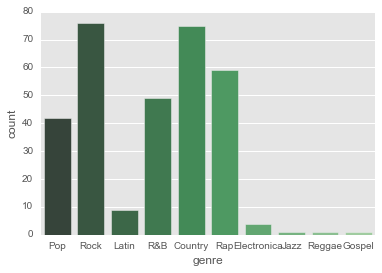

In [452]:
sns.countplot(x="genre", data=df, palette="Greens_d");#chart of genres in list 

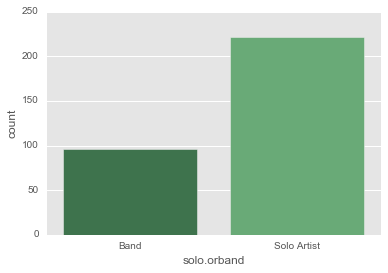

In [453]:
sns.countplot(x="solo.orband", data=df, palette="Greens_d");#chart of genres in list 

In [454]:
#df_time = df.groupby(['time','weeks_on_charts'])
df['list_time'] = [row[0] for row in df['time']]
df['list_time'].value_counts() #x

3    154
4    125
5     20
2     11
6      4
7      3
Name: list_time, dtype: int64

In [455]:
def replace_nulls(value): 
    if value == '*': 
        return np.nan
    else: 
        return value
df = df.applymap(replace_nulls)
df.iloc[:,7:]=df.iloc[:,7:].apply(pd.to_numeric, errors='ignore')
df['weeks_on_charts']= df.iloc[:,8:].count(axis=1)
df#x

,year,artist.inverted,solo.orband,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,...,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,list_time,weeks_on_charts
0,2000,Destiny's Child,Band,Independent Women Part I,3:38,Pop,2000-09-23,974505600000000000,78,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,29
1,2000,Santana,Solo Artist,"Maria, Maria",4:18,Rock,2000-02-12,955152000000000000,15,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,27
2,2000,Savage Garden,Band,I Knew I Loved You,4:07,Rock,1999-10-23,949104000000000000,71,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,34
3,2000,Madonna,Solo Artist,Music,3:45,Pop,2000-08-12,969062400000000000,41,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,25
4,2000,"Aguilera, Christina",Solo Artist,Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,971481600000000000,57,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,22
5,2000,Janet,Solo Artist,Doesn't Really Matter,4:17,Rock,2000-06-17,967248000000000000,59,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,25
6,2000,Destiny's Child,Band,Say My Name,4:31,Rock,1999-12-25,953337600000000000,83,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,33
7,2000,"Iglesias, Enrique",Solo Artist,Be With You,3:36,Latin,2000-04-01,961804800000000000,63,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,21
8,2000,Sisqo,Solo Artist,Incomplete,3:52,R&B,2000-06-24,966038400000000000,77,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,27
9,2000,Lonestar,Band,Amazed,4:25,Country,1999-06-05,952128000000000000,81,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,56


In [456]:
df.sort_values('time',inplace=True) 

In [457]:
df['list_time'].count

<bound method Series.count of 166    2
92     2
42     2
158    2
142    2
151    2
203    2
275    2
236    2
194    2
302    2
261    3
90     3
56     3
312    3
162    3
227    3
259    3
87     3
40     3
254    3
10     3
113    3
221    3
30     3
287    3
177    3
154    3
101    3
11     3
      ..
106    4
28     4
276    4
213    5
233    5
306    5
155    5
44     5
299    5
228    5
156    5
46     5
114    5
175    5
234    5
220    5
178    5
72     5
163    5
200    5
209    5
131    5
253    5
282    6
229    6
118    6
109    6
100    7
128    7
49     7
Name: list_time, dtype: int64>

In [458]:
df.groupby(['list_time'])['weeks_on_charts'].mean()

list_time
2    16.727273
3    17.902597
4    18.080000
5    16.250000
6    14.000000
7    14.000000
Name: weeks_on_charts, dtype: float64

In [459]:
df.groupby(['genre'])['weeks_on_charts'].sum()

genre
Country        1335
Electronica      76
Gospel           21
Jazz              6
Latin           166
Pop             775
R&B             779
Rap             858
Reggae           16
Rock           1592
Name: weeks_on_charts, dtype: int64

In [460]:
df.groupby(['genre'])['weeks_on_charts'].mean()

genre
Country        17.800000
Electronica    19.000000
Gospel         21.000000
Jazz            6.000000
Latin          18.444444
Pop            18.452381
R&B            15.897959
Rap            14.542373
Reggae         16.000000
Rock           20.947368
Name: weeks_on_charts, dtype: float64

In [461]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Scatter(
    x = df['list_time'] ,
    y = df['weeks_on_charts'],
    name = 'Above',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)



data = [trace0]
"""title='x Axis',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
"""
layout = dict(title = 'Weeks on Chart by Length of Song',
              yaxis = dict(title='weeks on chart', titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f')
        ),
              xaxis = dict(title='song length (minutes)',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
      
        ))
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')


#layout = dict(title = 'Weeks on Chart by Length of Song',
              #yaxis = dict(zeroline = False),
              #xaxis = dict(zeroline = False)
             #)



High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~biancaelder/0 or inside your plot.ly account where it is named 'styled-scatter'


In [462]:
df

trace0 = go.Scatter(
    x = df['time'] ,
    y = df['weeks_on_charts'],
    name = 'Above',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)



data = [trace0]

layout = dict(title = 'Weeks on Chart by Length of Song',
              yaxis = dict(title='weeks on chart', titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f')
        ),
              xaxis = dict(title='song length (minutes and seconds)',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
      
        ))
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~biancaelder/0 or inside your plot.ly account where it is named 'styled-scatter'


In [463]:
df['list_time'].corr(df['weeks_on_charts'])

-0.042013726451193133

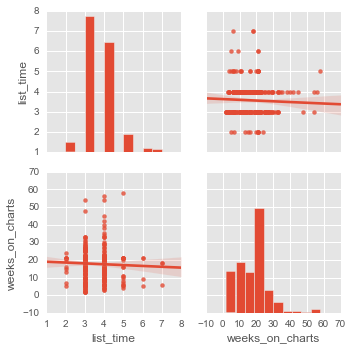

In [464]:
import seaborn as sns
sns.pairplot(df[['list_time','weeks_on_charts']], kind="reg")


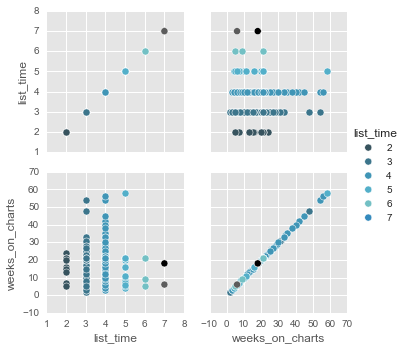

In [465]:
g = sns.PairGrid(df_hypothesis, hue="list_time", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();

In [397]:
from scipy import stats
stats.ttest_ind(three_four['weeks_on_charts'], other['weeks_on_charts'])

#stats.ttest_rel(df_hypothesis['list_time'],df['weeks_on_charts'])

#time on chart 3/4 minutes vs other lengths 

Ttest_indResult(statistic=1.2799251841915329, pvalue=0.20151326296634769)

In [390]:
#hypothesis = [x for x in df['list_time'] if x == 3 or x == 4,]
#null_hypothesis = [x for x in df['list_time'] if x != 3 and x != 4]
#df['list_time'] = [row[0] for row in df['time']]

#mean_hypothesis.groupby(df['weeks_on_charts'].mean()
df_hypothesis = pd.concat([df['list_time'],df['weeks_on_charts']], axis = 1)
df_hypothesis['three_or_four'] = ['three/four' if x == 3 or x == 4 else 'other' for x in df_hypothesis ['list_time']] 
three_four = df_hypothesis.loc[df_hypothesis['three_or_four'] == 'three/four', :]
other = df_hypothesis.loc[df_hypothesis['three_or_four'] == 'other', :]

In [391]:
other

,list_time,weeks_on_charts,three_or_four
166,2,16,other
92,2,21,other
42,2,24,other
158,2,21,other
142,2,21,other
151,2,21,other
203,2,15,other
275,2,13,other
236,2,7,other
194,2,20,other


In [ ]:
from scipy import stats
stats.ttest_ind(three_four['weeks_on_charts'], other['weeks_on_charts'])

#stats.ttest_rel(df_hypothesis['list_time'],df['weeks_on_charts'])

#time on chart 3/4 minutes vs other lengths 

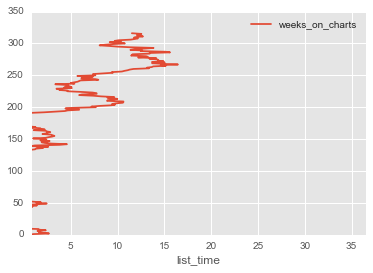

In [275]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['list_time', 'weeks_on_charts']).cumsum()

df3['weeks_on_charts'] = pd.Series(list(range(len(df))))

df3.plot(x='list_time', y='weeks_on_charts')


NameError: name 'im' is not defined

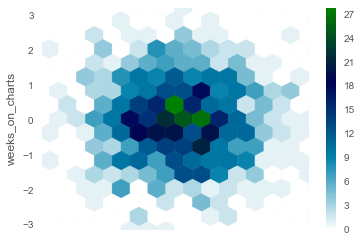

In [403]:
pd.DataFrame(np.random.randn(1000,2), columns=['time', 'weeks_on_charts'])

#df['weeks_on_charts'] = df['weeks_on_charts'] + np.arange(1000)

df.plot.hexbin(x='time', y='weeks_on_charts', cmap='ocean_r',gridsize=15)

im.set_clim(vmin, vmax)
plt.clim(0,7)
plt.colorbar()


In [277]:
import seaborn as sns
sns.pairplot(df[['list_time','weeks_on_charts']], kind="reg")

KeyError: "['list_time'] not in index"

Dataset: #description of data and any cleaning you did 
-remove duplicates, make sure names are properly spelled, create column that lists number of weeks on list, 

Demo: 
- Perform exploratory data analysis
- Use Tableau and/or Python plotting modules to visualize data
- Observe correlations in the data

In [ ]:
Methods

In [ ]:
Results 
Evaluate a hypothesis



In [ ]:
- Present results in a polished companion blog post of at least 500 words (& 1-2 graphics!)